# This notebook solves the Huggett Model (1993) using Dolo.

In [1]:
# First import the packages
Pkg.dir("Dolo")
import Dolo
using AxisArrays
using PyPlot

. To use SymEngine call Pkg.add("SymEngine")


In [2]:
# get the model file
filename=("huggett_1993.yaml")

"huggett_1993.yaml"

In [10]:
# Convert the file into Dolo model
model=Dolo.yaml_import(filename)

Model 


MethodError: MethodError: no method matching sanitize(::Expr, ::Dolo.Model{Symbol("##379")})[0m
Closest candidates are:
  sanitize(::Expr, [1m[31m::Array{Symbol,1}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:14
  sanitize(::Any, [1m[31m::Array{Symbol,1}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:3
  sanitize(::Any, [1m[31m::Dolo.SModel{ID}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:32[0m

Now let's look at solving the model. We will use Dolo's time iteration function (which iterates on the residuals of the arbitrage equation).

In [11]:
@time sol=Dolo.time_iteration(model,verbose=true, maxit=1000, details=true)
dr=sol.dr
@time res = Dolo.time_iteration(model, dr; maxit=200, details=true)

It    SA          gain        nit  
-----------------------------------
0     4.08e-02    NaN         0    
1     2.03e-02    4.97e-01    2    
2     1.99e-02    9.84e-01    2    
3     1.98e-02    9.92e-01    2    
4     1.97e-02    9.98e-01    2    
5     1.98e-02    1.00e+00    2    
6     1.98e-02    1.00e+00    2    
7     1.97e-02    9.95e-01    2    
8     1.94e-02    9.84e-01    2    
9     1.94e-02    1.00e+00    2    
10    1.97e-02    1.02e+00    2    
11    2.00e-02    1.01e+00    2    
12    2.01e-02    1.00e+00    2    
13    1.98e-02    9.86e-01    2    
14    2.03e-02    1.02e+00    2    
15    2.07e-02    1.02e+00    2    
16    2.09e-02    1.01e+00    2    
17    2.08e-02    9.95e-01    2    
18    2.14e-02    1.03e+00    2    
19    2.18e-02    1.02e+00    2    
20    2.16e-02    9.93e-01    2    
21    2.23e-02    1.03e+00    2    
22    2.26e-02    1.01e+00    2    
23    2.28e-02    1.01e+00    2    
24    2.34e-02    1.03e+00    2    
25    2.34e-02    1.00e+00  

Results of Time Iteration Algorithm
 * Complementarities: true
 * Decision Rule type: Dolo.TimeIterationResult
 * Number of iterations: 1
 * Convergence: true
   * |x - x'| < 1.0e-08: true


Dolo tabulate gives us the decision rules.

In [12]:
drtab = Dolo.tabulate(model, dr, :s) 

2-dimensional AxisArray{Float64,2,...} with axes:
    :V, Symbol[:lny,:s,:a]
    :s, [-2.0,-1.77778,-1.55556,-1.33333,-1.11111,-0.888889,-0.666667,-0.444444,-0.222222,0.0  …  18.0,18.2222,18.4444,18.6667,18.8889,19.1111,19.3333,19.5556,19.7778,20.0]
And data, a 3×100 Array{Float64,2}:
  0.0   0.0         0.0         0.0        …   0.0       0.0      0.0   
 -2.0  -1.77778    -1.55556    -1.33333       19.5556   19.7778  20.0   
  0.0  -0.0311888  -0.0618873  -0.0916056     -1.01499  -1.0216  -1.0282

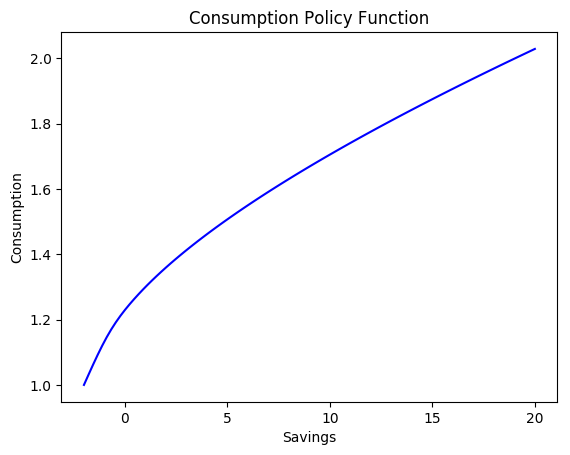

PyObject <matplotlib.text.Text object at 0x00000000048F2198>

In [6]:
# Plot the consumption policy function
import PyPlot
plt=PyPlot
r=0.00002
c=exp(drtab[Axis{:V}(:lny)])+drtab[:s]*r-drtab[Axis{:V}(:a)]

plt.plot(drtab[Axis{:V}(:s)],c, color="blue")
plt.xlabel("Savings")
plt.ylabel("Consumption")
plt.title("Consumption Policy Function")

### Simulations

Here are plots for the simulations. We see that the agent's consumption is equal to his income, as to be expected, since we are in a one-agent economy.

In [7]:
# Simulations
import PyPlot
plt=PyPlot


mc_ar=model.exogenous

sim_armc = Dolo.simulate(model,dr;N=1000,T=200)


T=200

200

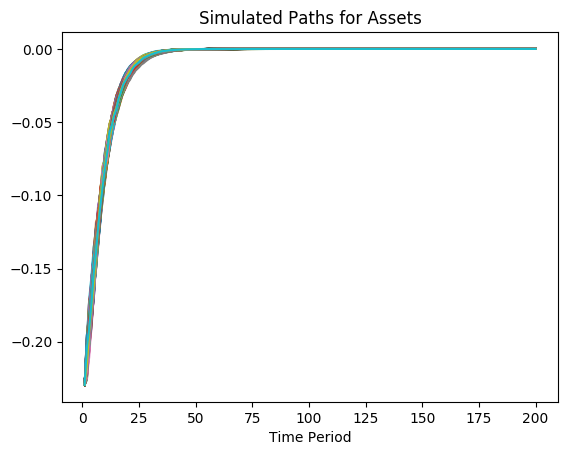

In [14]:
N=1000
n=200 # number of periods to plot
hor=linspace(1,n,n)
function plot_simulations(N::Int64,T::Int64,n::Int64,sim_armc)
    sum_assets=0.0
    for ii=1:N # number of simulations
      c=exp(sim_armc[Axis{:N}(ii), Axis{:V}(:lny)])[T-n+1:T]+sim_armc[Axis{:N}(ii), Axis{:V}(:s)][T-n+1:T]*r-sim_armc[Axis{:N}(ii), Axis{:V}(:a)][T-n+1:T]
      #plt.plot(hor, exp(sim_armc[Axis{:N}(ii), Axis{:V}(:lny)])[T-n+1:T],color="blue", alpha=0.35, label="income")
      #assets=exp(sim_armc[Axis{:N}(ii), Axis{:V}(:lny)])[T-n+1:T]-c
      #plt.plot(hor, exp(sim_armc[Axis{:N}(ii), Axis{:V}(:lny)])[T-n+1:T])
      #plt.plot(hor, c)  
        savings_end=exp(sim_armc[Axis{:N}(ii), Axis{:V}(:lny)])[T]-c[end]
      plt.plot(hor,exp(sim_armc[Axis{:N}(ii), Axis{:V}(:lny)])[T-n+1:T]-c )
      sum_assets=sum_assets+savings_end
    
    end
    plt.legend()
    plt.xlabel("Time Period")
    plt.title("Simulated Paths for Assets")
    
    return sum_assets
end


sum_assets=plot_simulations(N,T,n,sim_armc);


We see that the average asset holdings is almost zero so we have market clearing.

In [9]:
println("The average asset holdings is ", sum_assets/N)

The average asset holdings is 3.9999999971947695e-5
